In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/igor/pessoal/movie-predict/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "TMDB_movie_dataset_v11.csv"
df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "asaniczka/tmdb-movies-dataset-2023-930k-movies",
    file_path,
)

# file_path = "../data/TMDB_movie_dataset_v11.csv"
# df = pd.read_csv(file_path)

In [3]:
print('\n'.join(df.columns.to_list()))

id
title
vote_average
vote_count
status
release_date
revenue
runtime
adult
backdrop_path
budget
homepage
imdb_id
original_language
original_title
overview
popularity
poster_path
tagline
genres
production_companies
production_countries
spoken_languages
keywords


In [4]:
df.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,...,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,...,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,...,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,...,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f..."
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,...,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ..."
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,...,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285712 entries, 0 to 1285711
Data columns (total 24 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1285712 non-null  int64  
 1   title                 1285697 non-null  object 
 2   vote_average          1285712 non-null  float64
 3   vote_count            1285712 non-null  int64  
 4   status                1285712 non-null  object 
 5   release_date          1033312 non-null  object 
 6   revenue               1285712 non-null  int64  
 7   runtime               1285712 non-null  int64  
 8   adult                 1285712 non-null  bool   
 9   backdrop_path         329838 non-null   object 
 10  budget                1285712 non-null  int64  
 11  homepage              134051 non-null   object 
 12  imdb_id               637932 non-null   object 
 13  original_language     1285712 non-null  object 
 14  original_title        1285697 non-

## Cleaning Data

In [6]:
## Cleaning adult movies
df = df[~df['adult']]
df = df.drop(columns=['adult'])
df.shape

(1158919, 23)

In [7]:
df['status'].value_counts()

status
Released           1121209
In Production        16387
Post Production      11360
Planned               9117
Rumored                520
Canceled               326
Name: count, dtype: int64

In [8]:
df = df[df['status'] == 'Released']
df = df.drop(columns=['status'])
df.shape

(1121209, 22)

In [9]:
unused_columns = ['backdrop_path', 'homepage', 'homepage', 'imdb_id', 'poster_path']
df = df.drop(columns=unused_columns)
df.shape

(1121209, 18)

In [10]:
df.describe()

,id,vote_average,vote_count,revenue,runtime,budget,popularity
count,1.121209e+06,1.121209e+06,1.121209e+06,1.121209e+06,1.121209e+06,1.121209e+06,1.121209e+06
mean,7.942408e+05,1.805900e+00,1.910363e+01,7.333266e+05,4.139098e+01,2.745505e+05,1.186503e+00
std,4.415011e+05,2.970287e+00,3.206878e+02,1.978479e+07,5.775589e+01,5.202004e+06,7.140117e+00
min,2.000000e+00,0.000000e+00,0.000000e+00,-1.200000e+01,-2.800000e+01,0.000000e+00,0.000000e+00
25%,4.175340e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e-01
50%,7.879520e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,6.000000e-01
75%,1.191266e+06,4.400000e+00,1.000000e+00,0.000000e+00,8.200000e+01,0.000000e+00,8.690000e-01
max,1.544356e+06,1.000000e+01,3.449500e+04,5.000000e+09,1.440000e+04,1.000000e+09,2.994357e+03


In [11]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['id', 'vote_average', 'vote_count', 'revenue', 'runtime', 'budget',
       'popularity'],
      dtype='object')

In [12]:
df[numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1121209 entries, 0 to 1285710
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   id            1121209 non-null  int64  
 1   vote_average  1121209 non-null  float64
 2   vote_count    1121209 non-null  int64  
 3   revenue       1121209 non-null  int64  
 4   runtime       1121209 non-null  int64  
 5   budget        1121209 non-null  int64  
 6   popularity    1121209 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 68.4 MB


In [13]:
df = df[(df['runtime'] > 0) & (df['runtime'] < 480)]
df.shape

(797889, 18)

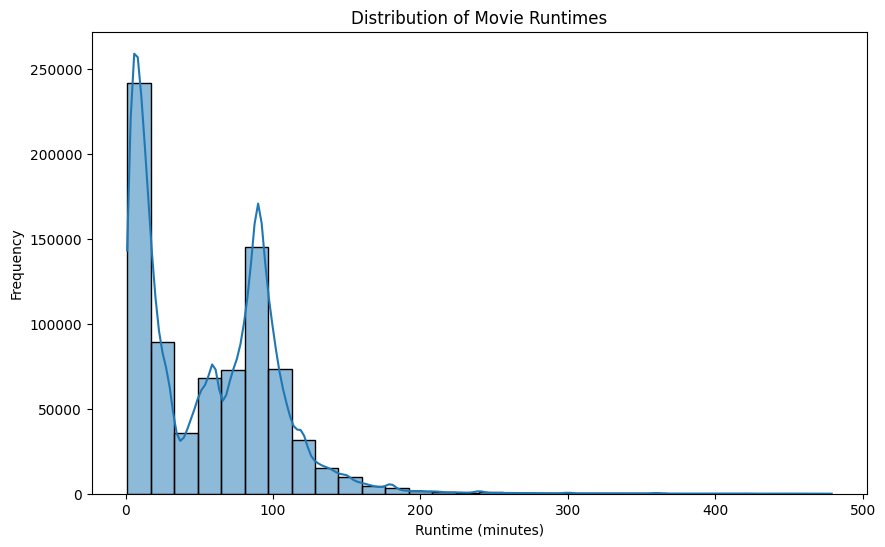

In [14]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['runtime'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Frequency')
plt.show()

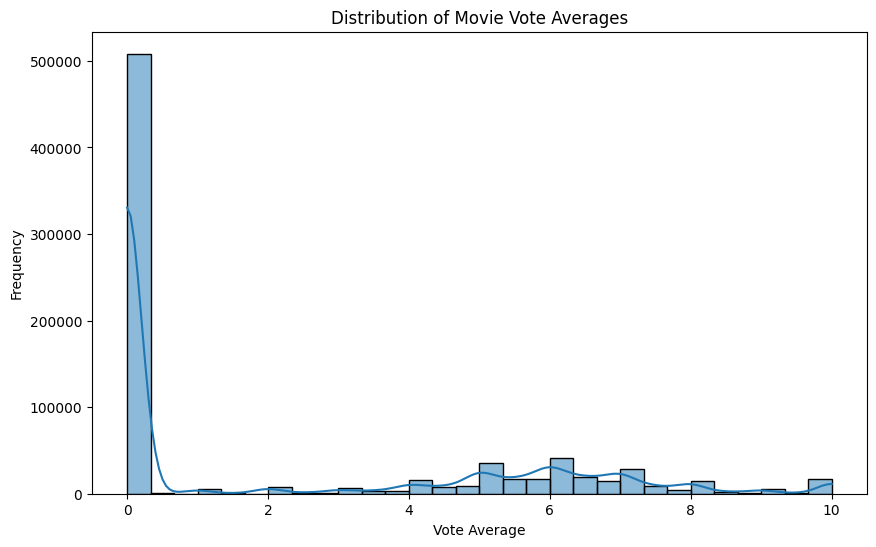

In [15]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [16]:
df = df[df['vote_average'] > 0]
df.shape

(289660, 18)

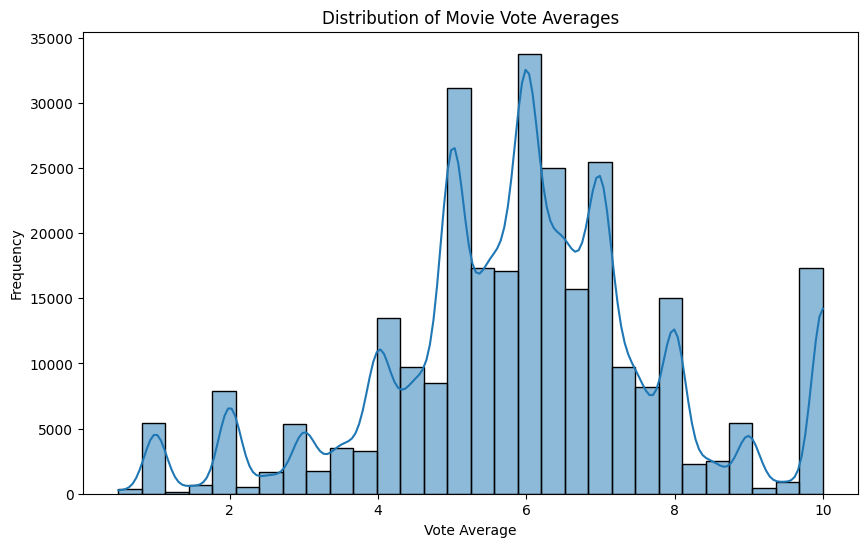

In [17]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'].dropna(), bins=30, kde=True)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Frequency')
plt.show()

In [18]:
df = df[df['vote_count'] > 1000]

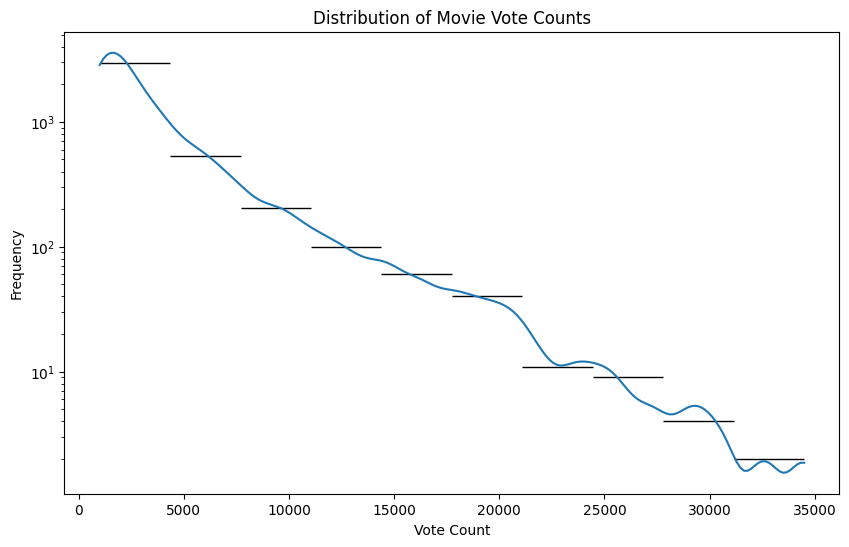

In [19]:
fig = plt.figure(figsize=(10, 6))
sns.histplot(df['vote_count'].dropna(), bins=10, kde=True, log_scale=(False, True))
plt.title('Distribution of Movie Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

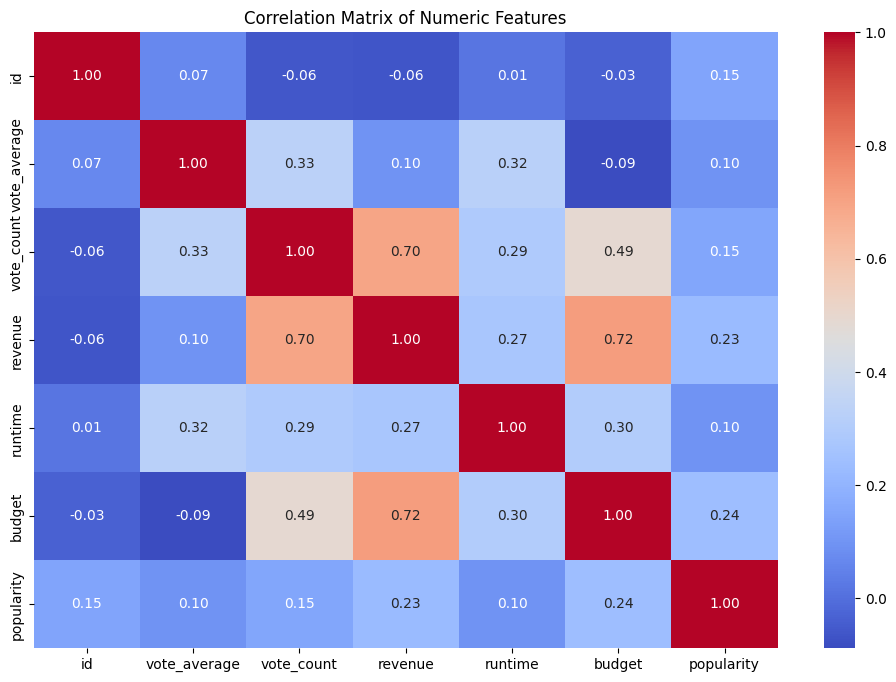

In [20]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3937 entries, 0 to 3936
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3937 non-null   int64  
 1   title                 3937 non-null   object 
 2   vote_average          3937 non-null   float64
 3   vote_count            3937 non-null   int64  
 4   release_date          3937 non-null   object 
 5   revenue               3937 non-null   int64  
 6   runtime               3937 non-null   int64  
 7   budget                3937 non-null   int64  
 8   original_language     3937 non-null   object 
 9   original_title        3937 non-null   object 
 10  overview              3937 non-null   object 
 11  popularity            3937 non-null   float64
 12  tagline               3651 non-null   object 
 13  genres                3937 non-null   object 
 14  production_companies  3932 non-null   object 
 15  production_countries  3935